## HANDS OF DATA ANALISYS WITH PANDAS


Script By Rikardoroa - Just python it!

Chapter One

In [1]:
#script by rikardoroa, just python it!
#basic statistics plotting variables
import numpy as np
import random
import statistics as sty
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.mlab as mlab
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
from functools import wraps


class BasicStadistics_Plotting:
    
    #inicializating variables
    def __init__(self, df=None)->pd.DataFrame():
        self.df = df
    
    @classmethod
    def plotting_data(cls,function):
        @wraps(function)
        def plot(*args,**kwargs):
            obj = function(*args,**kwargs)
            
            #generating graph
            fig, ax = plt.subplots(figsize=(15,12))
            ax = sns.histplot(data=obj[0], x="seed", ax=ax, kde=True)
            ax = sns.histplot(data=obj[0], x="lower_bound", ax=ax, kde=True, color='Crimson')
            ax = sns.histplot(data=obj[0], x="upper_bound", ax=ax, kde=True, color='Crimson')
            
            obj = obj[1:]
            labels=["25th Percentile","75th Percentile",
                    "Min Value","Max Value","Mean","Mode","Median","+Standard Deviation","-Standard Deviation",
                    "Lower CI","Upper CI"]
            colors=['m','r','g','orange','salmon','navy','brown','coral','chocolate','GoldenRod','DarkOrchid']
            lines=['-','--','-','-','-','-.','-.','-.','-.','-.','-.']
            pos=[5,10,15,20,25,30,35,40,45,50,55]
            for index,item in enumerate(zip(obj,labels,colors,lines,pos)):
                
                ax.axvline(x=obj[index],color=colors[index], linestyle=lines[index], label=labels[index])
                ax.text(obj[index],pos[index],s=obj[index],horizontalalignment='center', fontweight='bold', color='black')
                ax.legend()

            return plt.show()
        return plot
            
            
        #passing variables with decorator

@BasicStadistics_Plotting.plotting_data
def Basic_Histogram(rseed,**kwargs):

    #inicializating df
    ramdom_seed =[]
    seed = [ramdom_seed.extend(x) for x in [x.tolist() for x in [x.astype(int) for x in rseed]]]
    df = pd.DataFrame(ramdom_seed).rename(columns={0:'seed'})

    #ci interval(confidence interval)
    ci = st.t.interval(alpha=0.95, df=len(df)-1, loc=np.mean(df), scale=st.sem(df)) 
    ci_lower_point = round(int(ci[0]),1)
    ci_upper_point = round(int(ci[1]),1)

    #generate histogram plot with basic variables
    mean = sty.mean(ramdom_seed)
    mode = sty.mode(ramdom_seed)
    median = sty.median(ramdom_seed)
    stdv = sty.stdev(ramdom_seed)

    #standard deviation
    positive_stdv = round(mean + stdv,1)
    negative_stdv = round(mean - stdv,1)

    #quartiles - pandas 
    p25 = df['seed'].quantile(0.25)  # Q25
    p75 = df['seed'].quantile(0.75)  # Q75

    #min and max values -  pandas 
    df_min_val = df.seed.min()
    df_max_val = df.seed.max()

    #confidence interval construct with the standard deviation error formula
    z= 1.96
    se = stdv /np.sqrt(ramdom_seed)
    lower_bound = mean - z* se  #lower limit of the CI
    upper_bound = mean + z* se  #upper limit of the CI


    #Dataframes with lower and upper limits
    df2 = pd.DataFrame(lower_bound).rename(columns={0:'lower_bound'})
    df['lower_bound'] = df2[['lower_bound']]
    df3 = pd.DataFrame(upper_bound).rename(columns={0:'upper_bound'})
    df['upper_bound'] = df3[['upper_bound']]

    #returnning variables
    return df,p25,p75,df_min_val,df_max_val,mean,mode,median,positive_stdv,negative_stdv,ci_lower_point,ci_upper_point

    





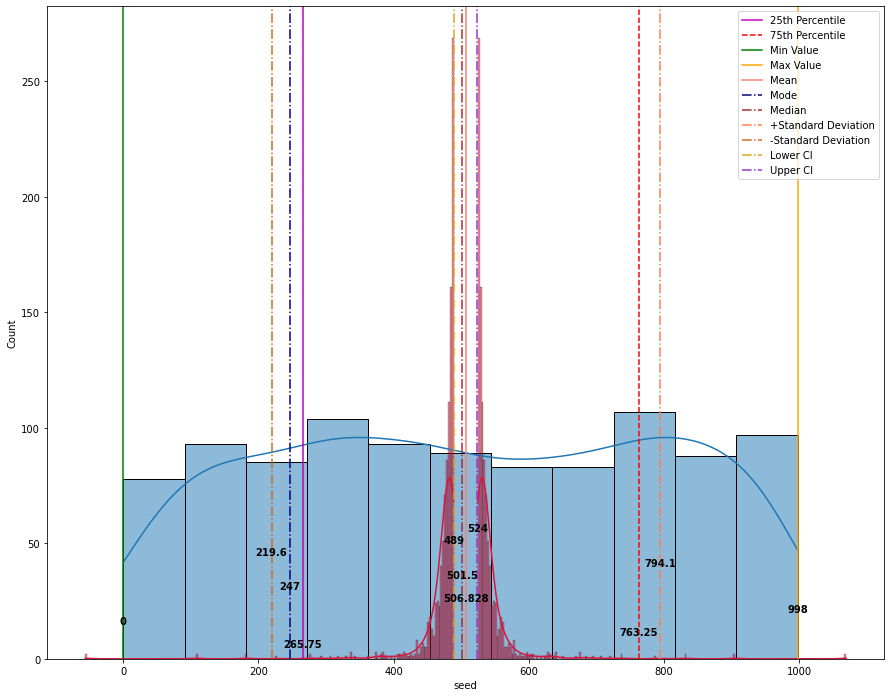

In [2]:
Basic_statistics = BasicStadistics_Plotting()
Basic_Histogram(np.random.rand(10,100)*1000)